### Titanic Dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
# set the color palette
sns.set_palette(sns.color_palette("husl"))
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
import load_transform as lt
from feature_exploration import feature_exploration as fe
from feature_exploration import tree
%reload_ext autoreload
%autoreload 2

In [11]:
df = lt.load_explore('train.csv')

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [12]:
df['GenderBoolean'] = df['Sex'].apply(lt.gender_boolean)

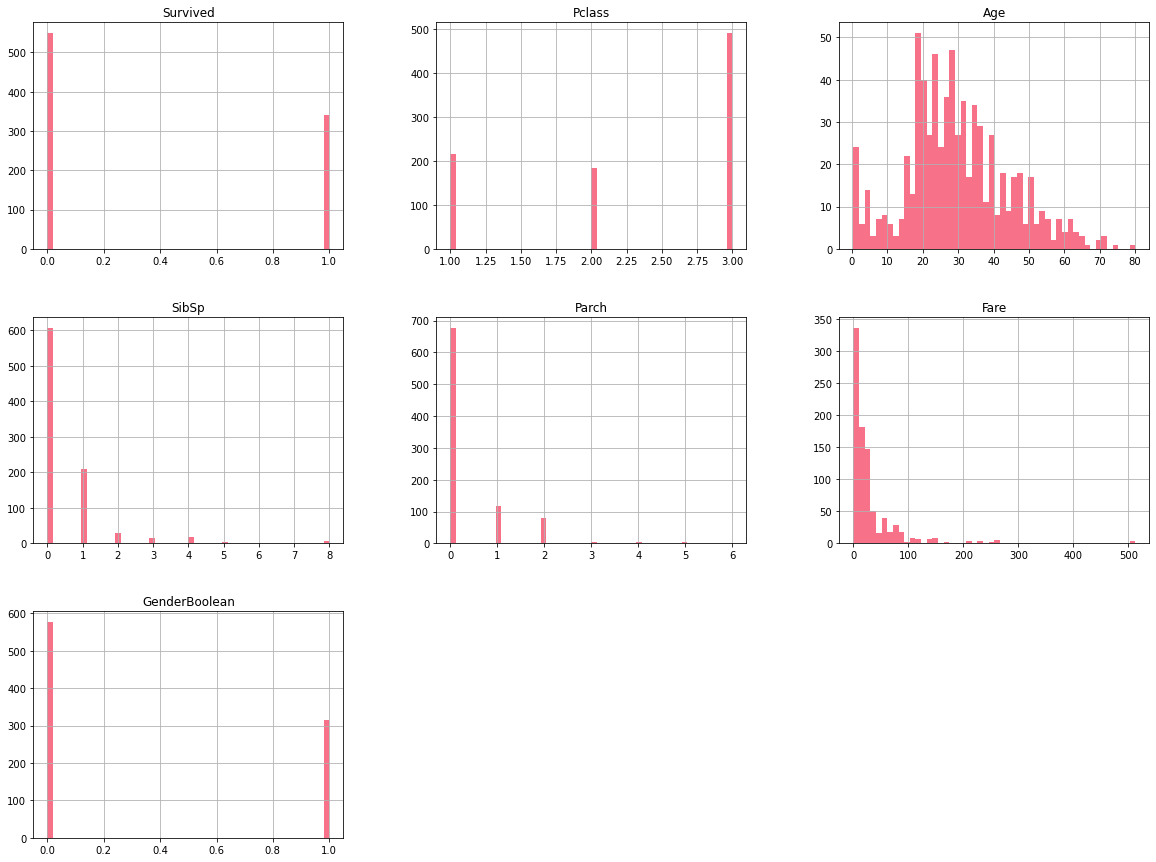

In [13]:
fe.show_feature_hist(df)

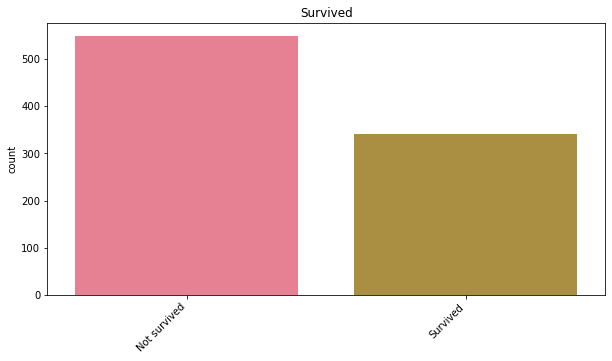

In [14]:
fe.plot_survived(df, df['Survived'])

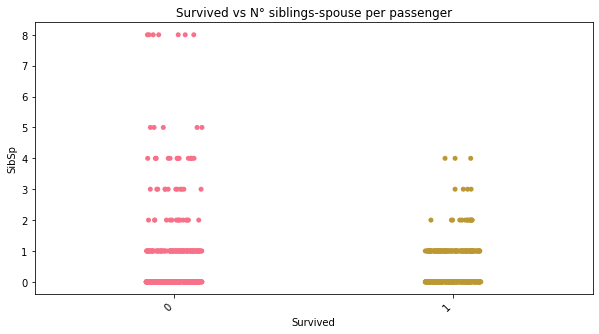

In [15]:
fe.plot_survived_vs_sib_spouse(df, df['Survived'], df['SibSp'])

In [29]:
corr=fe.get_correlation(df, 'Survived')
corr

AttributeError: module 'feature_exploration.feature_exploration' has no attribute 'get_correlation'

In [31]:
one_hot_array = fe.get_1hot_array(df[['Embarked']])
one_hot_array

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [38]:
clean_df = lt.create_clean_df(df, ['Survived', 'Pclass', 'Age', 'SibSp', 'GenderBoolean'])
clean_df

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [36]:
tree.model_decision_tree(clean_df)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_71/2054929892.py", line 1, in <cell line: 1>
    tree.model_decision_tree(clean_df)
  File "/home/jovyan/work/Projects/frauenloop-titanic/feature_exploration/tree.py", line 18, in model_decision_tree
    tree_clf.fit(train_data, train_label)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 578, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 814, in check_array
    raise ValueError(
ValueError: Found array with 0 feature(s) (shape=(89